# Step One 

In [9]:
import pandas as pd

df = pd.read_csv("./cybersecurity_attacks.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)




             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

# Step Two

In [10]:
# Return only duplicated rows
print(df[df.duplicated()])

Empty DataFrame
Columns: [Timestamp, Source IP Address, Destination IP Address, Source Port, Destination Port, Protocol, Packet Length, Packet Type, Traffic Type, Payload Data, Malware Indicators, Anomaly Scores, Alerts/Warnings, Attack Type, Attack Signature, Action Taken, Severity Level, User Information, Device Information, Network Segment, Geo-location Data, Proxy Information, Firewall Logs, IDS/IPS Alerts, Log Source]
Index: []

[0 rows x 25 columns]


# Step Three

In [11]:
df = df.fillna({
    'Malware Indicators' : 'IoC undetacted',
    'Alerts/Warnings' : 'Alert Unawarenessn',
    'Proxy Information' : 'anonymous',
    'Firewall Logs' : 'NO Data',
    'IDS/IPS Alerts' : 'Alert Unawarenessn'
})
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

# Step Four 

In [12]:
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts().reset_index().head(10))
    print("-" * 40)

Value counts for column: Timestamp
             Timestamp  count
0  2022-04-17 20:05:34      2
1  2022-06-11 14:28:15      2
2  2022-06-06 12:12:43      2
3  2023-06-27 11:02:56      1
4  2021-08-15 22:29:04      1
5  2022-07-20 13:28:50      1
6  2022-06-26 15:15:50      1
7  2020-09-30 21:35:31      1
8  2022-10-05 16:59:46      1
9  2021-05-29 15:33:51      1
----------------------------------------
Value counts for column: Source IP Address
  Source IP Address  count
0     103.216.15.12      1
1    78.199.217.198      1
2      63.79.210.48      1
3     163.42.196.10      1
4     71.166.185.76      1
5     198.102.5.160      1
6     97.253.103.59      1
7      11.48.99.245      1
8     49.32.208.167      1
9   114.109.149.113      1
----------------------------------------
Value counts for column: Destination IP Address
  Destination IP Address  count
0           84.9.164.252      1
1         66.191.137.154      1
2          198.219.82.17      1
3        101.228.192.255      1
4    

In [13]:

# # === Ask the user for filtering criteria ===
# severity_level = input("Enter Severity Level (High/Medium/Low or leave blank): ").strip() or None
# anomaly_score_min = input("Enter minimum Anomaly Score (or leave blank): ").strip()
# traffic_type = input("Enter Traffic Type (or leave blank): ").strip() or None
# packet_type = input("Enter Packet Type (or leave blank): ").strip() or None
# protocol = input("Enter Protocol (TCP/UDP/ICMP or leave blank): ").strip() or None

# # Convert numeric input safely
# anomaly_score_min = float(anomaly_score_min) if anomaly_score_min else None

# # === Filter ===
# filtered_df = df.copy()

# if severity_level is not None:
#     filtered_df = filtered_df[filtered_df['Severity Level'] == severity_level]

# if anomaly_score_min is not None:
#     filtered_df = filtered_df[filtered_df['Anomaly Scores'] > anomaly_score_min]

# if traffic_type is not None:
#     filtered_df = filtered_df[filtered_df['Traffic Type'] == traffic_type]

# if packet_type is not None:
#     filtered_df = filtered_df[filtered_df['Packet Type'] == packet_type]

# if protocol is not None:
#     filtered_df = filtered_df[filtered_df['Protocol'] == protocol]

# filtered_df.head(100)

# Step Five 

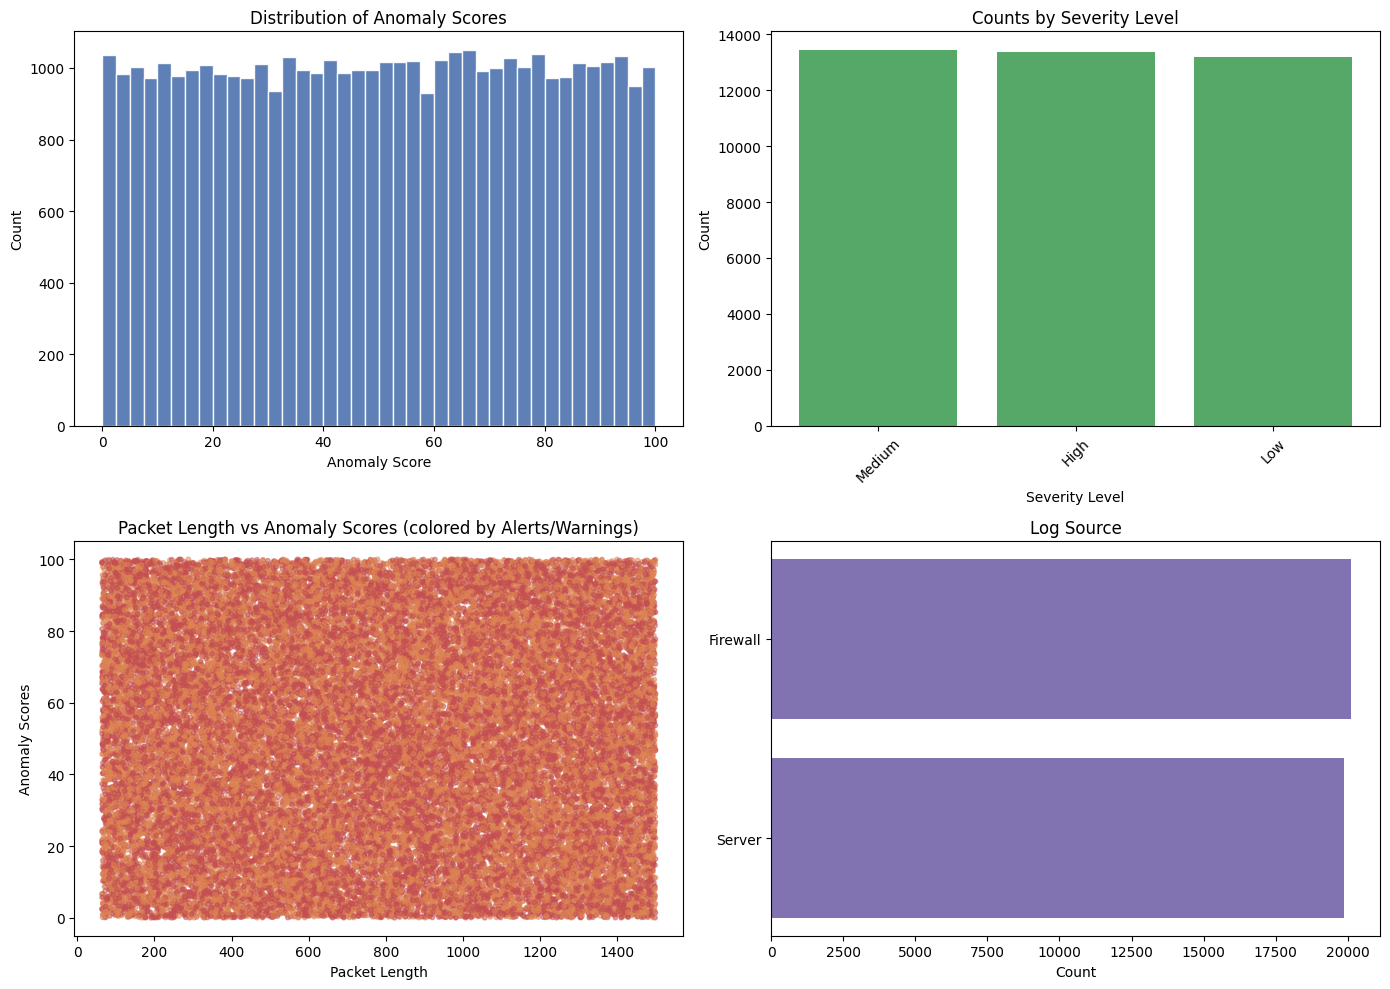

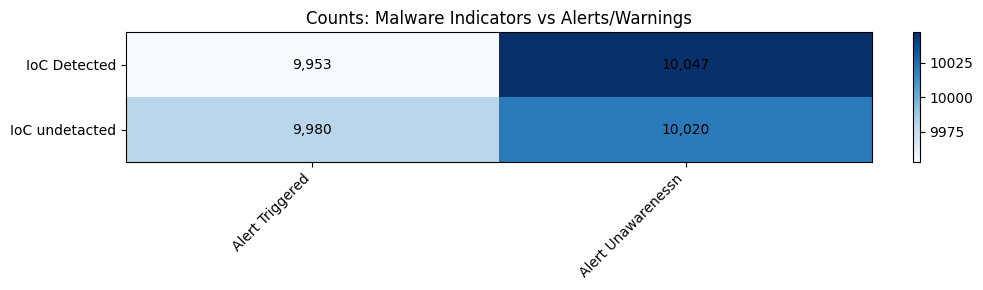

In [14]:
# Visualization cell using existing df, col, matplotlib (plt) and pandas (pd)
import matplotlib.pyplot as plt

# ensure Timestamp is datetime for any time-based visuals
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# 2x2 overview figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.ravel()

# 1) Histogram of Anomaly Scores
ax1.hist(df['Anomaly Scores'].dropna(), bins=40, color='#4C72B0', edgecolor='white', alpha=0.9)
ax1.set_title('Distribution of Anomaly Scores')
ax1.set_xlabel('Anomaly Score')
ax1.set_ylabel('Count')

# 2) Severity Level counts (bar)
severity_counts = df['Severity Level'].value_counts()
ax2.bar(severity_counts.index.astype(str), severity_counts.values, color='#55A868')
ax2.set_title('Counts by Severity Level')
ax2.set_xlabel('Severity Level')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

# 3) Scatter: Packet Length vs Anomaly Scores colored by Alerts/Warnings
color_map = {'Alert Triggered': '#C44E52', 'Alert Unawarenessn': '#DD8452'}
colors = df['Alerts/Warnings'].map(color_map).fillna('#7F7F7F')
ax3.scatter(df['Packet Length'], df['Anomaly Scores'], c=colors, s=10, alpha=0.5)
ax3.set_title('Packet Length vs Anomaly Scores (colored by Alerts/Warnings)')
ax3.set_xlabel('Packet Length')
ax3.set_ylabel('Anomaly Scores')


# 4) Log Source
top_logs = df[col].value_counts()
ax4.barh(top_logs.index.astype(str), top_logs.values, color='#8172B2')
ax4.set_title('Log Source')
ax4.set_xlabel('Count')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

# Separate figure: heatmap of Malware Indicators vs Alerts/Warnings counts
ct = pd.crosstab(df['Malware Indicators'], df['Alerts/Warnings'])

fig, ax = plt.subplots(figsize=(10, max(3, 0.25 * len(ct))))
im = ax.imshow(ct.values, cmap='Blues', aspect='auto')

# ticks and labels
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')
ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)
ax.set_title('Counts: Malware Indicators vs Alerts/Warnings')

# annotate cells with values
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.iat[i, j]
        ax.text(j, i, f"{int(val):,}", ha='center', va='center', color='black')

plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.04)
plt.tight_layout()
plt.show()

# Step Six 

In [15]:

import pandas as pd

cols_to_onehot = ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Type']

df_oh = pd.get_dummies(
    df,
    columns=cols_to_onehot,
    prefix=cols_to_onehot,
    drop_first=False,    # keep all dummies; set True to drop one per feature
    dummy_na=True        # add a column for NaN
)


In [16]:

if 'num_cols' not in globals():
    num_cols = df.select_dtypes(include='number').columns.tolist()

overwrite = globals().get('overwrite', False)
threshold = globals().get('threshold', 3.0)

# Ensure df_out exists so later guarded assignments don't raise NameError
if 'df_out' not in globals():
    # create a copy of df if you want df_out to mirror df structure;
    # adjust to pd.DataFrame() if you prefer an empty placeholder.
    df_out = df.copy()

if not num_cols:
    raise ValueError('No numeric columns found in df to scale.')

means = df[num_cols].mean()
stds = df[num_cols].std(ddof=0).replace(0, 1.0)

X_scaled = (df[num_cols] - means) / stds

if overwrite:
    df[num_cols] = X_scaled
    if 'df_out' in globals():
        df_out[num_cols] = X_scaled
    display_cols = num_cols
else:
    new_cols = [f'{c}__std' for c in num_cols]
    df[new_cols] = X_scaled.values
    if 'df_out' in globals():
        df_out[new_cols] = X_scaled.values
    display_cols = new_cols + num_cols

df[display_cols].head()

KeyError: "['Source IP Address_oct1', 'Source IP Address_oct2', 'Source IP Address_private', 'Destination IP Address_oct1', 'Destination IP Address_oct2', 'Destination IP Address_private', 'ts_hour', 'ts_dow'] not in index"

In [ ]:
z_abs = X_scaled.abs()

outlier_cols = [f"{c}__is_outlier" for c in num_cols]
df[outlier_cols] = z_abs > threshold

if 'df_out' in globals():
    df_out[outlier_cols] = df[outlier_cols]

df['Any_Outlier'] = df[outlier_cols].any(axis=1)
df['max_z'] = z_abs.max(axis=1)
df['max_z_col'] = z_abs.idxmax(axis=1)

if 'df_out' in globals():
    df_out[['Any_Outlier', 'max_z', 'max_z_col']] = df[['Any_Outlier', 'max_z', 'max_z_col']]

print("Outlier counts (per column + any):")
print(df[outlier_cols + ['Any_Outlier']].sum())

# show top rows by max z (outliers first if any)
display(df.sort_values('max_z', ascending=False).head(10))


Outlier counts (per column + any):
Source Port__is_outlier         0
Destination Port__is_outlier    0
Packet Length__is_outlier       0
Anomaly Scores__is_outlier      0
Any_Outlier                     0
dtype: int64


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Destination Port__std,Packet Length__std,Anomaly Scores__std,Source Port__is_outlier,Destination Port__is_outlier,Packet Length__is_outlier,Anomaly Scores__is_outlier,Any_Outlier,max_z,max_z_col
9090,2021-09-03 14:16:13,41.70.83.128,219.141.37.74,65530,26538,TCP,584,Data,HTTP,Expedita magnam eos architecto perferendis quo...,...,-0.356020,-0.474601,1.050368,False,False,False,False,False,1.754273,Source Port
19453,2020-03-25 14:45:23,79.247.183.127,48.43.148.83,65530,49170,TCP,1315,Control,FTP,Adipisci at aliquid quos fuga reiciendis sit. ...,...,0.862429,1.282445,-0.696749,False,False,False,False,False,1.754273,Source Port
6356,2021-03-17 01:42:19,102.241.167.71,88.129.114.222,65527,54083,ICMP,1114,Data,HTTP,Ipsa reiciendis tenetur soluta dignissimos quo...,...,1.126932,0.799318,-1.532357,False,False,False,False,False,1.754111,Source Port
36136,2020-06-24 13:22:10,216.63.122.229,168.82.58.206,65525,27111,ICMP,105,Control,FTP,Veniam sapiente est. Amet ipsa dolorem in ipsa...,...,-0.325171,-1.625936,1.374422,False,False,False,False,False,1.754003,Source Port
35290,2022-04-03 15:42:16,42.28.10.178,52.139.189.140,65525,61460,TCP,1323,Control,DNS,Optio ratione reprehenderit ducimus aspernatur...,...,1.524091,1.301674,0.921093,False,False,False,False,False,1.754003,Source Port
13750,2020-07-31 01:10:57,91.30.20.104,68.4.190.93,65523,49868,TCP,190,Control,FTP,Non facilis atque rerum dolorem dolorem. Provi...,...,0.900007,-1.421628,-1.490074,False,False,False,False,False,1.753896,Source Port
33217,2021-08-25 15:49:51,17.131.204.93,215.157.194.144,65522,55341,UDP,281,Control,HTTP,Possimus quam animi beatae. Labore tempora eos...,...,1.194660,-1.202899,1.350161,False,False,False,False,False,1.753842,Source Port
737,2023-07-08 18:01:32,185.212.35.187,7.144.161.242,65521,45643,UDP,406,Control,FTP,Ipsam ullam illo debitis aspernatur fugiat. Do...,...,0.672544,-0.902446,-0.192820,False,False,False,False,False,1.753788,Source Port
12579,2021-12-01 17:00:42,185.159.44.164,25.220.77.122,65518,46802,ICMP,614,Data,DNS,Blanditiis iusto quam saepe. Vero iure animi l...,...,0.734942,-0.402493,0.980705,False,False,False,False,False,1.753626,Source Port
36804,2021-12-31 16:06:53,135.243.250.4,25.187.227.174,65518,54718,TCP,664,Control,FTP,Natus voluptas optio pariatur harum.\nPlaceat ...,...,1.161119,-0.282312,1.605939,False,False,False,False,False,1.753626,Source Port


Correlation matrix (selected columns -> non-numeric columns factorized):
                Protocol  Traffic Type  Packet Type  Anomaly Scores
Protocol        1.000000     -0.000862     0.008517       -0.001846
Traffic Type   -0.000862      1.000000    -0.000740        0.000092
Packet Type     0.008517     -0.000740     1.000000       -0.005984
Anomaly Scores -0.001846      0.000092    -0.005984        1.000000


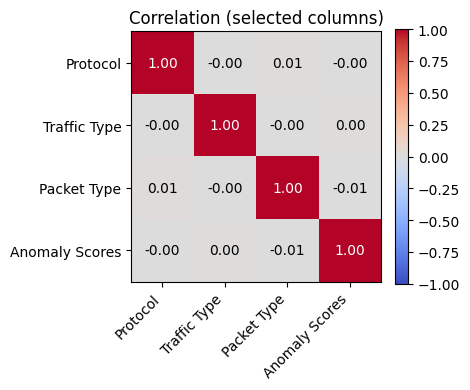

In [ ]:
specific_cols = ['Protocol', 'Traffic Type', 'Packet Type', 'Anomaly Scores']  # set what you want

# keep only columns that exist in df
available_cols = [c for c in specific_cols if c in df.columns]
if not available_cols:
    raise ValueError(f"None of the requested columns found in df: {specific_cols}")

# build a subset and convert non-numeric columns to numeric codes so corr() uses them too
df_subset = df[available_cols].copy()
non_numeric = df_subset.select_dtypes(exclude='number').columns.tolist()
for col in non_numeric:
    codes = pd.factorize(df_subset[col], sort=True)[0]
    # factorize uses -1 for NaN; replace with pandas NA so corr ignores missing
    df_subset[col] = pd.Series(codes, index=df_subset.index).replace(-1, pd.NA).astype(float)

# compute correlation on the prepared subset
corr = df_subset.corr()
print("Correlation matrix (selected columns -> non-numeric columns factorized):")
print(corr)

# plot heatmap
n = len(corr.columns)
fig, ax = plt.subplots(figsize=(max(4, n * 1.2), max(4, n * 1.2)))
im = ax.imshow(corr.values, cmap='coolwarm', vmin=-1, vmax=1, aspect='equal')

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)

# annotate
for i in range(n):
    for j in range(n):
        val = corr.iat[i, j]
        ax.text(j, i, f"{val:.2f}" if pd.notna(val) else "nan", ha='center', va='center',
                color='white' if abs(val) > 0.5 else 'black')

plt.title('Correlation (selected columns)')
plt.colorbar(im, ax=ax, fraction=0.046)
plt.tight_layout()
plt.show()

accuracy report:
0.3331
accuracy percentage = 33.31 %


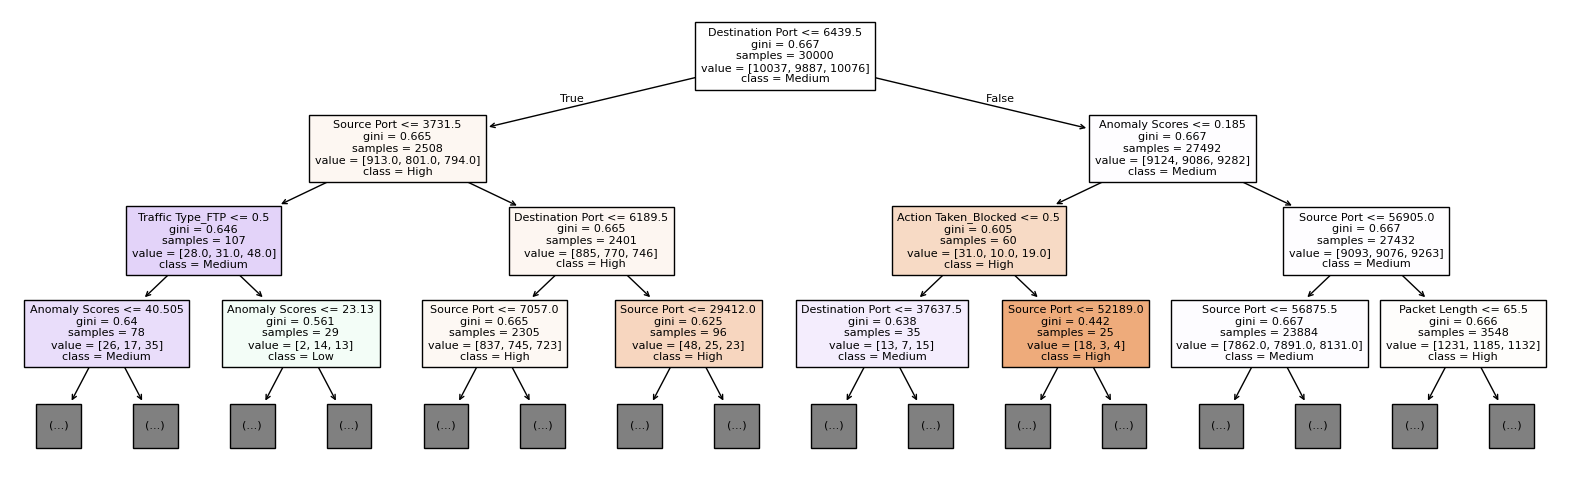

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

#choose target 
target = 'Severity Level'

if target not in df.columns:
    raise ValueError(f"target column {target} not found in dataset")

#identify y
y = df[target]

#feature selection 

num_cols = df.select_dtypes(include='number').columns.tolist() #All numeric column
cat_cols = [c for c in df.select_dtypes(include=object).columns if c != target] # obj_type columns excluding target 
cat_to_use = [c for c in cat_cols if df[c].nunique() <= 20] #limit cardinality

#build x with numeric + One_hot (feature selection)

x_part = []

if num_cols:
    x_part.append(df[num_cols])
if cat_to_use:#to convert categorical variables into a format suitable for machine learning(binary)
    x_part.append(pd.get_dummies(df[cat_to_use].astype(str), dummy_na=True))

#identify x
x = pd.concat(x_part, axis=1)

# train/test split
try:
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, stratify=y, random_state=42
    )
except ValueError:
    # fallback if stratify not possible (like 'single class')
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, random_state=42
    )

# train a small tree with (adjust max_depth as needed)

clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train) # for best split

# evaluate
y_pred = clf.predict(X_test)

print('accuracy report:')
print(metrics.accuracy_score(y_test, y_pred))
accuracy_percentage = metrics.accuracy_score(y_test, y_pred) * 100
print(f'accuracy percentage = {accuracy_percentage} %')

# plot a shallow version of the tree

plt.figure(figsize=(20, 6))
plot_tree(clf, max_depth=3, feature_names=x.columns, class_names=clf.classes_, filled=True, fontsize=8)
plt.show()


# Step eight -- Evaluation metics

Accuracy: 0.3329   Balanced Accuracy: 0.3307

Classification report:
              precision    recall  f1-score   support

        High       0.31      0.16      0.21      3345
         Low       0.38      0.01      0.03      3296
      Medium       0.34      0.82      0.48      3359

    accuracy                           0.33     10000
   macro avg       0.34      0.33      0.24     10000
weighted avg       0.34      0.33      0.24     10000


Per-class summary:


,precision,recall,f1,support
class,,,,
High,0.3146,0.1620,0.2139,3345
Low,0.3769,0.0149,0.0286,3296
Medium,0.3361,0.8151,0.4759,3359


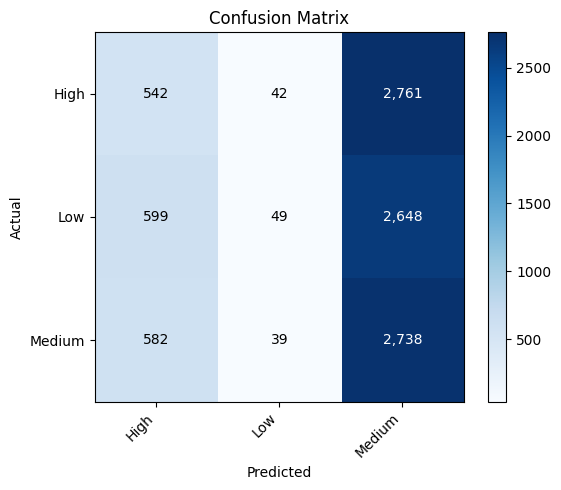

In [ ]:
import numpy as np
from sklearn.utils.multiclass import unique_labels
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
)

# ensure predictions exist
if 'y_pred' not in globals():
    y_pred = clf.predict(X_test)

# determine classes present in test/pred
labels = unique_labels(y_test, y_pred)  # only labels actually present
classes_clf = getattr(clf, "classes_", np.unique(y_test))  # classifier classes (for predict_proba)

# Basic scores
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}   Balanced Accuracy: {bal_acc:.4f}\n")

# Classification report (use labels present)
print("Classification report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=[str(l) for l in labels], zero_division=0))

# Precision/Recall/F1 table
p, r, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=labels, zero_division=0)
summary = {
    "class": labels,
    "precision": np.round(p, 4),
    "recall": np.round(r, 4),
    "f1": np.round(f1, 4),
    "support": support
}
print("\nPer-class summary:")
display(pd.DataFrame(summary).set_index("class"))

# Confusion matrix plot (only for labels present)
cm = confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticks(np.arange(len(labels))); ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]:,}", ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.colorbar(im, ax=ax, fraction=0.046)
plt.tight_layout()
plt.show()



# Step Nine -- linear regression  

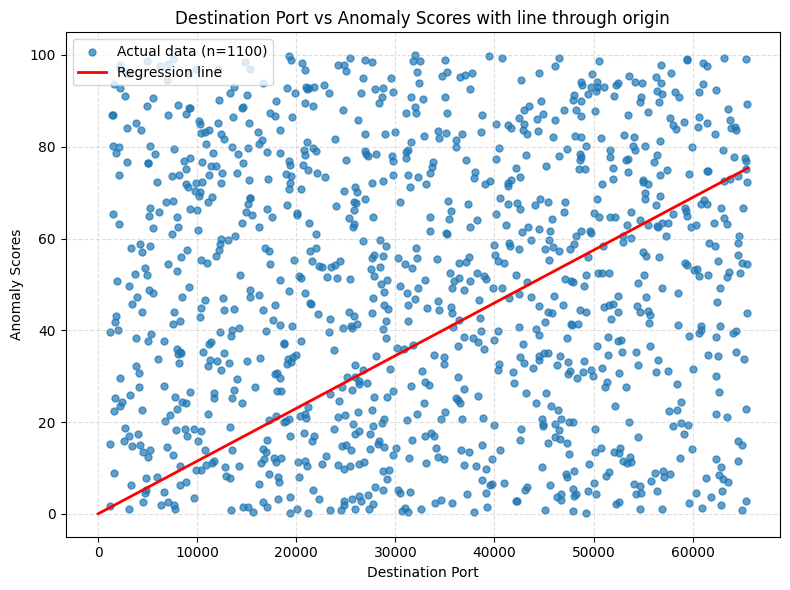

In [ ]:
# Scatter with straight line through origin: Packet Length vs Anomaly Scores
import numpy as np
import matplotlib.pyplot as plt

# prepare data: drop rows where either value is missing
mask = df[['Destination Port', 'Anomaly Scores']].notna().all(axis=1)
df_sub = df.loc[mask, ['Destination Port', 'Anomaly Scores']].astype(float)

if df_sub.shape[0] < 2:
    print('Not enough data points to fit a line through origin (need >=2)')
else:
    x_all = df_sub['Destination Port'].values
    y_all = df_sub['Anomaly Scores'].values

    # if all x are zero, fallback to horizontal mean line
    if np.allclose(x_all, 0):
        m = 0.0
        def line_fn(x):
            return np.full_like(x, y_all.mean(), dtype=float)
        fit_label = f'Fallback: constant y={y_all.mean():.4f} (all x==0)'
    else:
        # fit y = m * x  (no intercept) via least squares
        m = (x_all * y_all).sum() / (x_all**2).sum()
        def line_fn(x):
            return m * x
        fit_label = f'Regression line'

    # Downsample points for plotting markers
    max_points = 1100
    if len(df_sub) > max_points:
        df_plot = df_sub.sample(n=max_points, random_state=42)
    else:
        df_plot = df_sub

    x_plot = df_plot['Destination Port']
    y_plot = df_plot['Anomaly Scores']

    plt.figure(figsize=(8, 6))
    plt.scatter(x_plot, y_plot, s=25, alpha=0.7, label=f'Actual data (n={len(x_plot)})', color='#1f77b4')

    # Line from x=0 to max observed Packet Length
    x_line = np.linspace(0.0, max(0.0, df_sub['Destination Port'].max()), 200)
    y_line = line_fn(x_line)
    plt.plot(x_line, y_line, color='red', linewidth=2, label=fit_label)

    plt.xlabel('Destination Port')
    plt.ylabel('Anomaly Scores')
    plt.title('Destination Port vs Anomaly Scores with line through origin')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# GUI Form: classify input as Low / Mid / High
Use the form below to enter values and press **Submit** to get a classification result.

In [18]:

import ipywidgets as widgets
from IPython.display import display, HTML

# ---- Choice options ----
ANOMALY_CHOICES = [
    ("0.0 (None)", 0.0),
    ("0.5 (Low)", 0.5),
    ("2.0 (Mild)", 2.0),
    ("6.0 (High)", 6.0),
    ("10.0 (Extreme)", 10.0),
]

PROTOCOL_CHOICES = ["", "TCP", "UDP", "ICMP", "Other"]

ALERTS_CHOICES = ["", "Alert Triggered", "Alert Unawareness", "No Alert"]

TRAFFIC_TYPE_CHOICES = ["", "DNS", "FTP", "HTTP", "Other"]

ATTACK_TYPE_CHOICES = ["", "Intrusion", "DDoS", "Malware", "Other"]

MALWARE_INDICATOR_CHOICES = ["", "None", "IoC Detected", "IoC Undetected"]

# NEW fields you requested
PACKET_TYPE_CHOICES = ["", "Data", "Control"]
ATTACK_SIGNATURE_CHOICES = ["", "Known Pattern A", "Known Pattern B"]
ACTION_TAKEN_CHOICES = ["", "Blocked", "Ignored", "Logged"]

# ---- Widgets ----
w_anomaly = widgets.Dropdown(options=ANOMALY_CHOICES, description='Anomaly Score', value=0.0)
w_protocol = widgets.Dropdown(options=PROTOCOL_CHOICES, description='Protocol', value="")
w_alerts = widgets.Dropdown(options=ALERTS_CHOICES, description='Alerts', value="")
w_traffic = widgets.Dropdown(options=TRAFFIC_TYPE_CHOICES, description='Traffic Type', value="")
w_attack = widgets.Dropdown(options=ATTACK_TYPE_CHOICES, description='Attack Type', value="")
w_malware = widgets.Dropdown(options=MALWARE_INDICATOR_CHOICES, description='Malware Indicators', value="")

# New widgets
w_packet_type = widgets.Dropdown(options=PACKET_TYPE_CHOICES, description='Packet Type', value="")
w_signature = widgets.Dropdown(options=ATTACK_SIGNATURE_CHOICES, description='Attack Signature', value="")
w_action = widgets.Dropdown(options=ACTION_TAKEN_CHOICES, description='Action Taken', value="")

submit = widgets.Button(description='Submit', button_style='primary')
out = widgets.Output()

# ---- Classifier ----
def classify_from_inputs(anomaly, protocol, alerts, malware, traffic, attack, packet_type, signature, action):
    score = 0.0
    # Base anomaly
    score += float(anomaly) / 10.0

    # Alerts importance
    if alerts == 'Alert Triggered':
        score += 3.0
    elif alerts == 'Alert Unawareness':
        score += 1.0

    # Malware indicators (IoC / malware families)
    m = (malware or '').lower()
    if 'ioc' in m or 'malware' in m or 'trojan' in m or 'ransom' in m:
        score += 2.0

    # Protocol risk
    if protocol == 'ICMP':
        score += 1.0
    elif protocol == 'TCP':
        score += 0.5

    # Traffic / attack type presence boosts
    if str(traffic).strip():
        score += 0.2
    if str(attack).strip():
        score += 0.2

    # NEW: Packet Type: treat Control frames slightly riskier than Data
    if packet_type == 'Control':
        score += 0.3
    elif packet_type == 'Data':
        score += 0.1

    # NEW: Attack Signature: give more weight to specific known patterns
    if signature == 'Known Pattern A':
        score += 0.6
    elif signature == 'Known Pattern B':
        score += 0.4

    # NEW: Action Taken: Blocked reduces risk; Ignored increases; Logged is neutral+
    if action == 'Blocked':
        score -= 0.5
    elif action == 'Ignored':
        score += 0.5
    elif action == 'Logged':
        score += 0.2

    # Final label thresholds
    if score >= 6.0:
        label = 'High'
    elif score >= 3.0:
        label = 'Mid'
    else:
        label = 'Low'
    return label, score

# ---- Submit handler ----
def on_submit(b):
    with out:
        out.clear_output()
        label, score = classify_from_inputs(
            w_anomaly.value,
            w_protocol.value,
            w_alerts.value,
            w_malware.value,
            w_traffic.value,
            w_attack.value,
            w_packet_type.value,
            w_signature.value,
            w_action.value
        )

        # Optional color styling for clarity
        color = '#2e7d32' if label == 'Low' else ('#ef6c00' if label == 'Mid' else '#c62828')
        display(HTML(f'''
            <div style="font-family:system-ui,Segoe UI,Arial;line-height:1.4">
                <h3 style="margin:0 0 6px 0">Result:
                    <span style="color:{color}"><b>{label}</b></span>
                </h3>
                <p style="margin:0">Score: {score:.2f}</p>
            </div>
        '''))

submit.on_click(on_submit)

# ---- Layout ----
form = widgets.VBox([
    widgets.HBox([w_anomaly, w_protocol, w_alerts]),
    widgets.HBox([w_traffic, w_attack, w_malware]),
    widgets.HBox([w_packet_type, w_signature, w_action]),
    submit,
    out
])

display(form)


# addtion step -> test 

Detected 0 existing one-hot columns.
Train rows: 30000 | Features (dense): 17
One-hot columns reused: 0
[HGB] {'learning_rate': 0.05, 'max_leaf_nodes': 31, 'max_iter': 300} -> Acc=0.3255 | Macro-F1=0.3221
[HGB] {'learning_rate': 0.05, 'max_leaf_nodes': 63, 'max_iter': 300} -> Acc=0.3294 | Macro-F1=0.3279
[HGB] {'learning_rate': 0.1, 'max_leaf_nodes': 31, 'max_iter': 300} -> Acc=0.3384 | Macro-F1=0.3371
[LogReg-saga] C=0.5 -> Acc=0.3346 | Macro-F1=0.3311
[LogReg-saga] C=1.0 -> Acc=0.3346 | Macro-F1=0.3311
[LogReg-saga] C=2.0 -> Acc=0.3346 | Macro-F1=0.3311
[LogReg-saga] C=5.0 -> Acc=0.3346 | Macro-F1=0.3311

Winner: HGB {'learning_rate': 0.1, 'max_leaf_nodes': 31, 'max_iter': 300} | Acc=0.3384 | Macro-F1=0.3371 | Time=317.6s

Classification report:
               precision    recall  f1-score   support

        High       0.34      0.29      0.31      3345
         Low       0.34      0.34      0.34      3296
      Medium       0.34      0.39      0.36      3359

    accuracy           

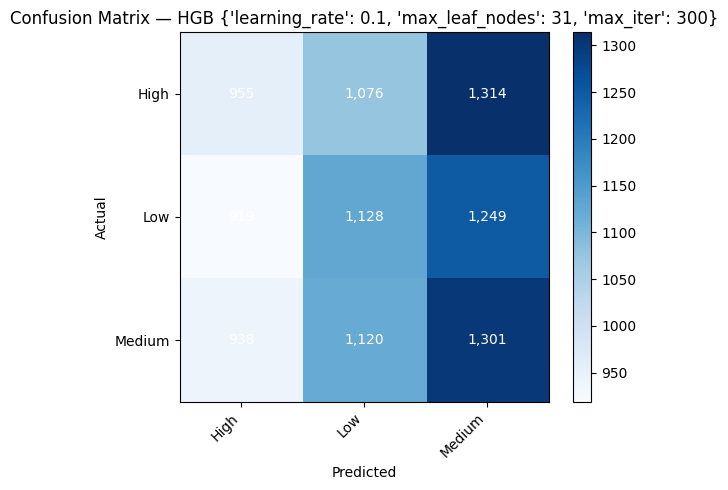

In [ ]:

# # ==========================================
# # Unified "Train & Compare" with 5 Fixes
# # - Reuses existing ONE-HOT columns (no re-OHE)
# # - Adds interactions, time features, compact IP features
# # - Optional text hashing for linear model (sparse)
# # - Trains HGB (dense) + Logistic Regression (saga, sparse)
# # ==========================================

# import time
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# from sklearn.utils.class_weight import compute_sample_weight

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.feature_extraction.text import HashingVectorizer
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.pipeline import Pipeline
# from scipy import sparse

# # --------------------- CONFIG ---------------------
# TARGET              = 'Severity Level'  # Target column
# INCLUDE_TEXT_HASH   = True              # Hash text-heavy columns for the linear model
# HASH_DIM            = 2**12             # Hashing size (try 2**12..2**14)
# SAMPLE_ROWS         = None              # e.g., 20000 for faster dev runs; None = use all rows
# LR_C_VALUES         = [0.5, 1.0, 2.0, 5.0]     # Logistic Regression regularization sweep
# HGB_CONFIGS         = [                         # small, fast tuning grid
#     {'learning_rate': 0.05, 'max_leaf_nodes': 31, 'max_iter': 300},
#     {'learning_rate': 0.05, 'max_leaf_nodes': 63, 'max_iter': 300},
#     {'learning_rate': 0.10, 'max_leaf_nodes': 31, 'max_iter': 300},
# ]

# # --------------------- VALIDATION ---------------------
# if TARGET not in df.columns:
#     raise ValueError(f"Target column '{TARGET}' not found in df")

# data = df.copy()
# if SAMPLE_ROWS:
#     data = data.sample(n=min(SAMPLE_ROWS, len(data)), random_state=42)

# # If you have ONEHOT_COLS saved earlier, this will use it; otherwise infer 0/1 columns
# def infer_onehot_cols(df, target):
#     oh = []
#     for c in df.columns:
#         if c == target: 
#             continue
#         s = df[c]
#         if s.dtype == bool:
#             oh.append(c)
#         elif np.issubdtype(s.dtype, np.number):
#             vals = pd.unique(s.dropna().astype(float))
#             if set(vals).issubset({0.0, 1.0}) and len(vals) <= 2:
#                 oh.append(c)
#     return oh

# ONEHOT_COLS = globals().get('ONEHOT_COLS', infer_onehot_cols(data, TARGET))
# print(f"Detected {len(ONEHOT_COLS)} existing one-hot columns.")

# # --------------------- FIX 3: INTERACTIONS ---------------------
# df_feat = data.copy()

# # Normalize common typos for consistency (optional)
# if 'Alerts/Warnings' in df_feat.columns:
#     df_feat['Alerts/Warnings'] = (df_feat['Alerts/Warnings']
#         .astype(str).str.replace('Unawarenessn', 'Unawareness', regex=False))

# if 'Malware Indicators' in df_feat.columns:
#     df_feat['Malware Indicators'] = (df_feat['Malware Indicators']
#         .astype(str).str.replace('undetacted', 'Undetected', regex=False))

# # Interactions
# if {'Anomaly Scores','Alerts/Warnings'}.issubset(df_feat.columns):
#     is_alert = (df_feat['Alerts/Warnings'].astype(str) == 'Alert Triggered').astype(np.float32)
#     df_feat['anomaly_x_alert'] = df_feat['Anomaly Scores'].astype(float) * is_alert

# if {'Packet Length','Protocol'}.issubset(df_feat.columns):
#     proto_tcp  = (df_feat['Protocol'].astype(str) == 'TCP').astype(np.float32)
#     proto_icmp = (df_feat['Protocol'].astype(str) == 'ICMP').astype(np.float32)
#     df_feat['plen_x_tcp']  = df_feat['Packet Length'].astype(float) * proto_tcp
#     df_feat['plen_x_icmp'] = df_feat['Packet Length'].astype(float) * proto_icmp

# if {'Action Taken','Anomaly Scores'}.issubset(df_feat.columns):
#     act_ignored = (df_feat['Action Taken'].astype(str) == 'Ignored').astype(np.float32)
#     act_logged  = (df_feat['Action Taken'].astype(str) == 'Logged').astype(np.float32)
#     df_feat['anomaly_x_ignored'] = df_feat['Anomaly Scores'].astype(float) * act_ignored
#     df_feat['anomaly_x_logged']  = df_feat['Anomaly Scores'].astype(float) * act_logged

# # --------------------- FIX 4: TIME + IP FEATURES ---------------------
# # Timestamp -> hour & day-of-week
# if 'Timestamp' in df_feat.columns:
#     ts = pd.to_datetime(df_feat['Timestamp'], errors='coerce')
#     df_feat['ts_hour'] = ts.dt.hour.fillna(0).astype(np.float32)
#     df_feat['ts_dow']  = ts.dt.dayofweek.fillna(0).astype(np.float32)

# # Fast, vectorized IP features
# def add_ip_feats_inplace(X, col):
#     s = X[col].astype(str)
#     parts = s.str.split('.', expand=True)
#     X[f'{col}_oct1'] = pd.to_numeric(parts[0], errors='coerce').fillna(0).astype(np.float32)
#     X[f'{col}_oct2'] = pd.to_numeric(parts[1], errors='coerce').fillna(0).astype(np.float32)
#     X[f'{col}_private'] = (
#         s.str.startswith('10.') |
#         s.str.startswith('192.168.') |
#         s.str.match(r'^172\.(1[6-9]|2[0-9]|3[0-1])\.')
#     ).astype(np.float32)

# for col in ['Source IP Address','Destination IP Address']:
#     if col in df_feat.columns:
#         add_ip_feats_inplace(df_feat, col)

# # --------------------- FIX 2: TEXT HASHING (optional, for linear model) ---------------------
# TEXT_COLS = [c for c in ['Payload Data','User Information','Device Information'] if c in df_feat.columns]

# def make_text_hasher(col, n_features=HASH_DIM):
#     vec = HashingVectorizer(
#         n_features=n_features,
#         alternate_sign=False,
#         analyzer='word',
#         ngram_range=(1, 2),
#         lowercase=True,
#         dtype=np.float32
#     )
#     return Pipeline([
#         ('pick', FunctionTransformer(lambda X: X[[col]].astype(str).fillna(''), validate=False)),
#         ('flatten', FunctionTransformer(lambda X: X.iloc[:,0], validate=False)),
#         ('hash', vec)
#     ])

# TEXT_HASHERS = {c: make_text_hasher(c, n_features=HASH_DIM) for c in TEXT_COLS} if INCLUDE_TEXT_HASH else {}

# # --------------------- BUILD FEATURE SETS (reuse your one-hot) ---------------------
# y = df_feat[TARGET].astype(str)

# # Numeric columns (auto) + your existing one-hot
# num_cols_base = [c for c in df_feat.columns if c != TARGET and np.issubdtype(df_feat[c].dtype, np.number)]
# ONEHOT_COLS = [c for c in ONEHOT_COLS if c in df_feat.columns]  # ensure present

# dense_feature_cols = sorted(list(set(num_cols_base) | set(ONEHOT_COLS)))

# # Dense matrix for HGB (drop raw text cols to keep it compact)
# DROP_TEXT_FOR_HGB = [c for c in ['Payload Data','User Information','Device Information','Proxy Information','Geo-location Data'] if c in df_feat.columns]
# X_dense = df_feat[dense_feature_cols].copy()

# # Sparse base for LR (same numeric/one-hot; text added as hashed blocks at transform time)
# X_sparse_base = X_dense.copy()

# # Train/Test split
# X_train_dense, X_test_dense, y_train, y_test = train_test_split(
#     X_dense, y, test_size=0.25, stratify=y, random_state=42
# )
# X_train_sparse, X_test_sparse, _y1, _y2 = train_test_split(
#     X_sparse_base, y, test_size=0.25, stratify=y, random_state=42
# )

# # Align columns and set compact dtypes
# X_test_dense  = X_test_dense.reindex(columns=X_train_dense.columns, fill_value=0)
# X_test_sparse = X_test_sparse.reindex(columns=X_train_sparse.columns, fill_value=0)

# X_train_dense = X_train_dense.astype(np.float32)
# X_test_dense  = X_test_dense.astype(np.float32)
# X_train_sparse = X_train_sparse.astype(np.float32)
# X_test_sparse  = X_test_sparse.astype(np.float32)

# print(f"Train rows: {len(X_train_dense)} | Features (dense): {X_train_dense.shape[1]}")
# print(f"One-hot columns reused: {len(ONEHOT_COLS)}")

# # --------------------- FIX 5: TRAIN & COMPARE ---------------------
# t0 = time.time()

# # A) HistGradientBoosting (dense) with balanced weights
# w_train = compute_sample_weight('balanced', y_train)
# best_hgb, best_hgb_scores, best_hgb_pred, best_hgb_cfg = None, (-1.0, -1.0), None, None

# for cfg in HGB_CONFIGS:
#     hgb = HistGradientBoostingClassifier(random_state=42, **cfg)
#     hgb.fit(X_train_dense, y_train, sample_weight=w_train)
#     pred = hgb.predict(X_test_dense)
#     acc = accuracy_score(y_test, pred)
#     f1m = f1_score(y_test, pred, average='macro')
#     print(f"[HGB] {cfg} -> Acc={acc:.4f} | Macro-F1={f1m:.4f}")
#     if f1m > best_hgb_scores[1]:
#         best_hgb, best_hgb_scores, best_hgb_pred, best_hgb_cfg = hgb, (acc, f1m), pred, cfg

# # B) Logistic Regression (saga) on sparse base + hashed text
# def build_sparse_with_text(X_base):
#     blocks = [sparse.csr_matrix(X_base.values)]
#     for col, hasher in TEXT_HASHERS.items():
#         H = hasher.transform(df_feat.loc[X_base.index])  # pull text by row index
#         blocks.append(H if sparse.issparse(H) else sparse.csr_matrix(H))
#     return sparse.hstack(blocks, format='csr')

# Xs_train = build_sparse_with_text(X_train_sparse)
# Xs_test  = build_sparse_with_text(X_test_sparse)

# best_lr, best_lr_scores, best_lr_pred, best_lr_C = None, (-1.0, -1.0), None, None

# for C in LR_C_VALUES:
#     lr = LogisticRegression(
#         solver='saga', penalty='l2', C=C,
#         max_iter=1000, tol=1e-3,
#         class_weight='balanced', random_state=42
#     )
#     lr.fit(Xs_train, y_train)
#     pred = lr.predict(Xs_test)
#     acc = accuracy_score(y_test, pred)
#     f1m = f1_score(y_test, pred, average='macro')
#     print(f"[LogReg-saga] C={C} -> Acc={acc:.4f} | Macro-F1={f1m:.4f}")
#     if f1m > best_lr_scores[1]:
#         best_lr, best_lr_scores, best_lr_pred, best_lr_C = lr, (acc, f1m), pred, C

# # Pick winner by Macro-F1
# if best_hgb_scores[1] >= best_lr_scores[1]:
#     w_name, w_acc, w_f1, w_pred = f'HGB {best_hgb_cfg}', best_hgb_scores[0], best_hgb_scores[1], best_hgb_pred
# else:
#     w_name, w_acc, w_f1, w_pred = f'LogReg-saga C={best_lr_C}', best_lr_scores[0], best_lr_scores[1], best_lr_pred

# t1 = time.time()

# print("\n==========================================")
# print(f"Winner: {w_name} | Acc={w_acc:.4f} | Macro-F1={w_f1:.4f} | Time={t1 - t0:.1f}s")
# print("==========================================\n")
# print("Classification report:\n", classification_report(y_test, w_pred, zero_division=0))

# # Confusion matrix
# labels = sorted(pd.unique(pd.concat([y_test, pd.Series(w_pred)])))
# cm = confusion_matrix(y_test, w_pred, labels=labels)
# fig, ax = plt.subplots(figsize=(6,5))
# im = ax.imshow(cm, cmap='Blues')
# ax.set_title(f'Confusion Matrix — {w_name}')
# ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')
# ax.set_xticks(np.arange(len(labels))); ax.set_yticks(np.arange(len(labels)))
# ax.set_xticklabels(labels, rotation=45, ha='right'); ax.set_yticklabels(labels)
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         ax.text(j, i, f'{cm[i,j]:,}', ha='center', va='center',
#                 color='white' if cm[i,j] > cm.max()/2 else 'black')
# fig.colorbar(im, ax=ax, fraction=0.046)
# plt.tight_layout(); plt.show()
